# Univariate rmse

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/shailendrapatil/Fall2017/Machine Learning A-Z Template Folder/Projects/House Price Advanced Regression Techniques/train.csv')
data.shape

(1460, 81)

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=data.select_dtypes(include=numerics).columns
data=data[numerical_vars]
data.shape

(1460, 38)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['SalePrice'],axis=1),
                                              data['SalePrice'],
                                              test_size=0.3,
                                              random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1022, 37) (1022,)
(438, 37) (438,)


We will use Decision Tree Regressor to choose the features

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [19]:
mse=[]
for feature in X_train.columns:
    regressor=DecisionTreeRegressor()
    regressor.fit(X_train[feature].fillna(0).to_frame(),y_train)
    prediction=regressor.predict(X_test[feature].fillna(0).to_frame())
    mse.append(mean_squared_error(y_test,prediction))
    
    


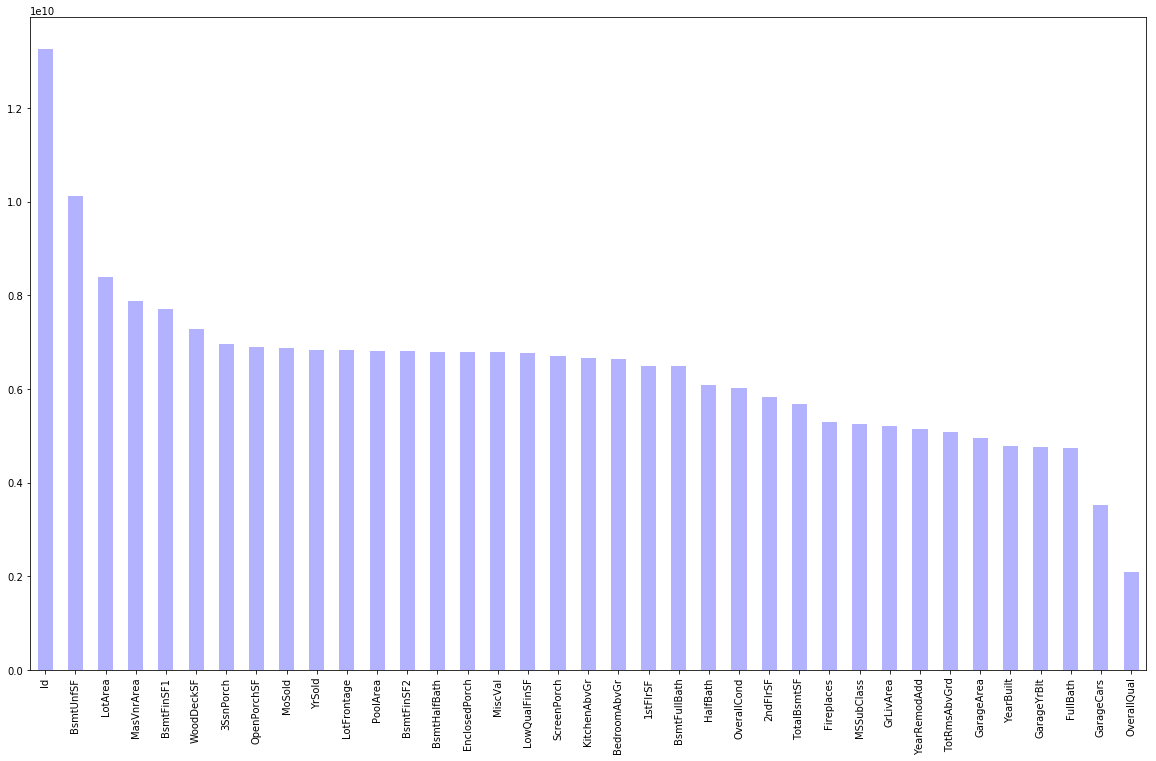

In [20]:
mse = pd.Series(mse)
mse.index = X_train.columns
mse.sort_values(ascending=False,inplace=True)
mse.plot.bar(figsize=(20,12),color='blue',alpha=0.3)
